In [1]:
import numpy as np
from cmb_cpu import cap, measure, coords

sky_temp = np.loadtxt("./input/cmb64_temp.txt")
sky_temp *= 10**6


sky_pos = np.loadtxt("./input/cmb64_pos.txt")
lat, lon = -20, 221
sky_pos = coords.rotate_pole_to_north(lat, lon, sky_pos)

## Dividing the CMB sphere to caps

In [2]:
cap_angles = np.arange(10, 180, 10)
n_samples = 64 * 3

X2 = np.zeros(len(cap_angles))

top, bottom = cap.get_top_bottom_caps(sky_temp, sky_pos,10)

for i, ca in enumerate(cap_angles):
    top, bottom = cap.get_top_bottom_caps(sky_temp, sky_pos, ca)
    t_c = measure.std_t(top[0])
    b_c = measure.std_t(bottom[0])
    X2[i] = (t_c - b_c)**2

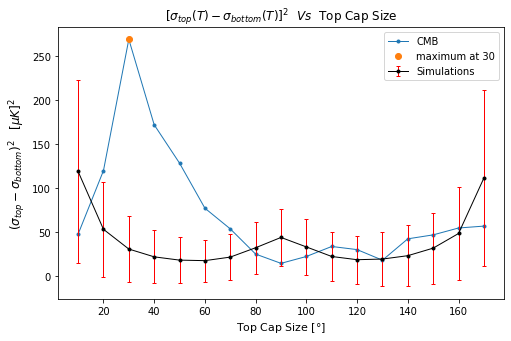

In [3]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1)
title = r'$[\sigma_{top}(T) - \sigma_{bottom}(T)]^2 \,\,\,\, Vs \,\,\,\,$Top Cap Size'
ax.set_title(title, fontsize = 12)


sim_anomaly = np.loadtxt("./output/errors_of_anomaly_vs_size.txt")
means   = sim_anomaly[:,1]
errors  = sim_anomaly[:,2]


# sky
ax.plot(cap_angles, X2, marker = '.', lw=1)
# simulation
ax.errorbar(cap_angles, means, errors, marker = '.', color='k', ecolor='red', lw=1, capsize=2, capthick=1)
# maximum of sky
_max = X2.argmax()
ax.plot(cap_angles[_max], X2[_max], "o")

# labels
label = r"$(\sigma_{top} - \sigma_{bottom})^2 \>\>\>\> [\mu K]^2$"
ax.set_ylabel(label, fontsize=12)
ax.set_xlabel(r"Top Cap Size [$\degree$]", fontsize=11)
# legends
max_point_label = "maximum at {}".format(cap_angles[_max])
ax.legend(["CMB", max_point_label, "Simulations"])

fig.set_size_inches(8,5)
plt.show()

## Dividing the CMB sphere to Rings

In [8]:
cap_angles = np.arange(0, 190, 10)
n_samples = 64 * 3

var_t = []
centers = []

for start, stop in zip(cap_angles[:-1], cap_angles[1:]):
    ring_temp = cap.get_ring(sky_temp, sky_pos, start, stop)
    var_t.append(measure.std_t(ring_temp))
    centers.append((start + stop) / 2)
var_t = np.array(var_t)
centers = np.array(centers)

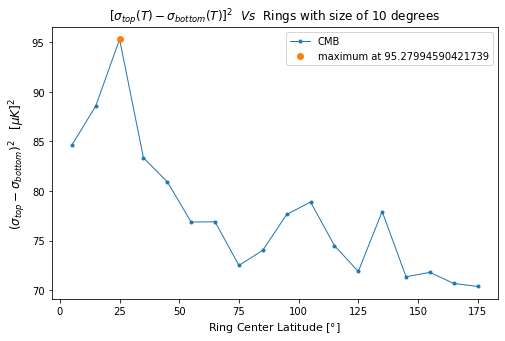

In [10]:
fig, ax = plt.subplots(1,1)
title = r'$[\sigma_{top}(T) - \sigma_{bottom}(T)]^2 \,\,\,\, Vs \,\,\,\,$Rings with size of 10 degrees'
ax.set_title(title, fontsize = 12)
# sky
ax.plot(centers, var_t, marker = '.', lw=1)
# labels
label = r"$(\sigma_{top} - \sigma_{bottom})^2 \>\>\>\> [\mu K]^2$"
ax.set_ylabel(label, fontsize=12)
ax.set_xlabel(r"Ring Center Latitude [$\degree$]", fontsize=11)
# maximum of sky
_max = var_t.argmax()
ax.plot(centers[_max], var_t[_max], "o")
# legends
max_point_label = "maximum at {}".format(var_t[_max])
ax.legend(["CMB", max_point_label])

fig.set_size_inches(8,5)
plt.show()